In [ ]:
# 1️⃣ Installation de la bibliothèque Kaggle (si non installée)
!pip install kaggle

# 2️⃣ Téléchargement de la clé API de Kaggle
from google.colab import files
files.upload()  # L'utilisateur doit importer son fichier kaggle.json

# 3️⃣ Configuration de l'authentification
import os
os.makedirs('/root/.kaggle', exist_ok=True)  # Création du dossier .kaggle s'il n'existe pas
!mv kaggle.json /root/.kaggle/  # Déplacement du fichier au bon emplacement
os.chmod('/root/.kaggle/kaggle.json', 600)  # Sécurisation du fichier

# 4️⃣ Téléchargement des datasets depuis Kaggle
!kaggle datasets download -d tmdb/tmdb-movie-metadata  # Remplace le chemin de Kaggle

# 5️⃣ Décompression du fichier ZIP
import zipfile
with zipfile.ZipFile('tmdb-movie-metadata.zip', 'r') as zip_ref:
    zip_ref.extractall('.')  # Extraction dans le répertoire actuel

# 6️⃣ Chargement des fichiers dans Pandas
import pandas as pd
import numpy as np

df1 = pd.read_csv('tmdb_5000_credits.csv')  # Chargement des crédits
df2 = pd.read_csv('tmdb_5000_movies.csv')   # Chargement des films

# Vérification du chargement
print(df1.head())
print(df2.head())


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
License(s): other
tmdb-movie-metadata.zip: Skipping, found more recently modified local copy (use --force to force download)
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c7

In [ ]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [ ]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
C= df2['vote_average'].mean()
C

6.092171559442016

In [ ]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [ ]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

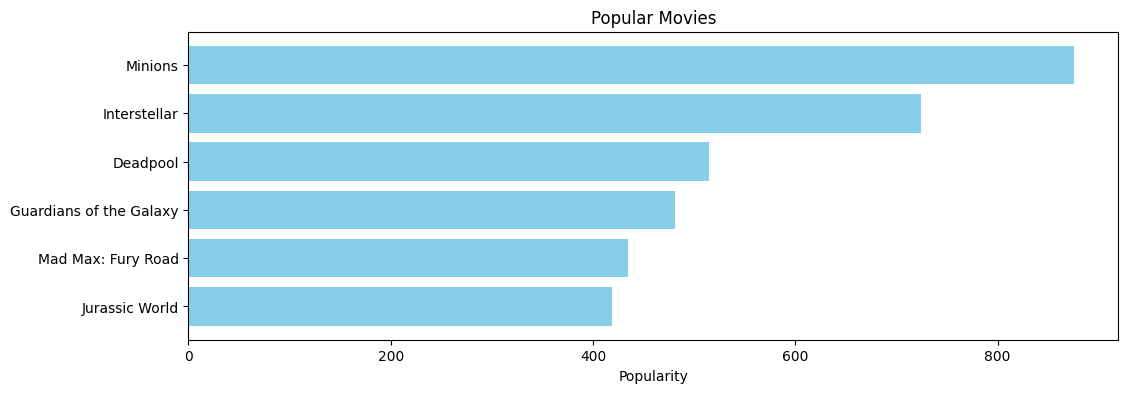

In [ ]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [ ]:
df2['overview'].head(5)

,overview
0,"In the 22nd century, a paraplegic Marine is di..."
1,"Captain Barbossa, long believed to be dead, ha..."
2,A cryptic message from Bond’s past sends him o...
3,Following the death of District Attorney Harve...
4,"John Carter is a war-weary, former military ca..."


In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

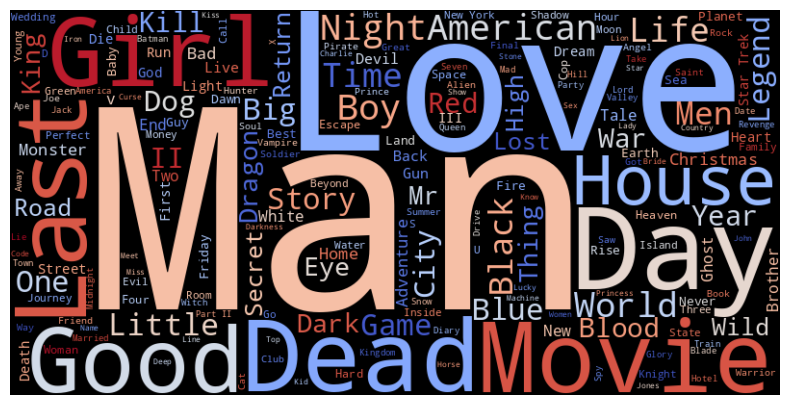

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Récupérer tous les titres des films
texte = " ".join(df2["title"].astype(str))

# Créer le Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="coolwarm").generate(texte)

# Afficher l'image du Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Enlever les axes
plt.show()

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Dark Knight Rises')

,title
65,The Dark Knight
299,Batman Forever
428,Batman Returns
1359,Batman
3854,"Batman: The Dark Knight Returns, Part 2"
119,Batman Begins
2507,Slow Burn
9,Batman v Superman: Dawn of Justice
1181,JFK
210,Batman & Robin


In [ ]:
get_recommendations('The Avengers')

,title
7,Avengers: Age of Ultron
3144,Plastic
1715,Timecop
4124,This Thing of Ours
3311,Thank You for Smoking
3033,The Corruptor
588,Wall Street: Money Never Sleeps
2136,Team America: World Police
1468,The Fountain
1286,Snowpiercer


In [ ]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [ ]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [ ]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [ ]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [ ]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [ ]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

,title
65,The Dark Knight
119,Batman Begins
4638,Amidst the Devil's Wings
1196,The Prestige
3073,Romeo Is Bleeding
3326,Black November
1503,Takers
1986,Faster
303,Catwoman
747,Gangster Squad


In [ ]:
get_recommendations('The Godfather', cosine_sim2)

,title
867,The Godfather: Part III
2731,The Godfather: Part II
4638,Amidst the Devil's Wings
2649,The Son of No One
1525,Apocalypse Now
1018,The Cotton Club
1170,The Talented Mr. Ripley
1209,The Rainmaker
1394,Donnie Brasco
1850,Scarface


In [ ]:
!pip install numpy==1.23.5

In [ ]:
# Install the kaggle library
!pip install kaggle

# Upload kaggle.json
from google.colab import files
files.upload()

# Create and configure the kaggle directory
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
os.chmod('/root/.kaggle/kaggle.json', 600)

# Download the dataset
!kaggle datasets download -d rounakbanik/the-movies-dataset

# Extract the dataset
import zipfile
with zipfile.ZipFile('the-movies-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# Fix: Import numpy before surprise
import numpy as np

# Load the ratings data
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

reader = Reader()
ratings = pd.read_csv('ratings_small.csv') # Updated path to the extracted file
ratings.head()

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
the-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
# Load the ratings data
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

reader = Reader()
ratings = pd.read_csv('ratings_small.csv') # Updated path to the extracted file
ratings.head()

# Create the dataset
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Perform cross-validation (no need to call data.split)
# For example, to evaluate an SVD algorithm:
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8998  0.8909  0.8971  0.8986  0.9002  0.8973  0.0034  
MAE (testset)     0.6922  0.6861  0.6892  0.6942  0.6921  0.6908  0.0028  
Fit time          5.29    4.03    5.60    2.33    1.39    3.73    1.64    
Test time         0.44    0.70    0.27    0.11    0.25    0.35    0.20    


{'test_rmse': array([0.89980506, 0.8908918 , 0.89713936, 0.89855188, 0.90021921]),
 'test_mae': array([0.69215703, 0.68611916, 0.68920176, 0.69423635, 0.69209988]),
 'fit_time': (5.292668104171753,
  4.0335822105407715,
  5.60242223739624,
  2.33240008354187,
  1.385152816772461),
 'test_time': (0.43841075897216797,
  0.7046523094177246,
  0.2738304138183594,
  0.10754203796386719,
  0.24760746955871582)}

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import accuracy # Import the accuracy module


# Load the ratings data
import pandas as pd

reader = Reader()
ratings = pd.read_csv('ratings_small.csv')  # Updated path to the extracted file
# Create the dataset
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
svd = SVD()

# Evaluate the model using cross-validation and print RMSE and MAE
# Perform cross-validation (no need to call data.split)
# For example, to evaluate an SVD algorithm:
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the average RMSE and MAE across folds
print(f"Average RMSE: {results['test_rmse'].mean()}")
print(f"Average MAE: {results['test_mae'].mean()}")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8981  0.8996  0.8996  0.8954  0.8937  0.8973  0.0024  
MAE (testset)     0.6926  0.6917  0.6911  0.6901  0.6893  0.6910  0.0012  
Fit time          1.36    1.74    2.08    1.42    1.42    1.60    0.27    
Test time         0.12    0.38    0.13    0.30    0.24    0.23    0.10    
Average RMSE: 0.8972697027342853
Average MAE: 0.6909651609623404


In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.619403673598007, details={'was_impossible': False})